In [25]:
#Importing libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

In [26]:
#Fetch Images count from Folders
dirs = os.listdir('flowers/')
count = 0
# print(os.listdir('flowers/'))
# --> result: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
for dir in dirs:
    files = list(os.listdir('flowers/' + dir))
    print( dir + ' Folder has ' + str(len(files)) + ' Images')
    count = count  + len(files)
print('Images Folder has ' + str(count) + ' Images')


daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Images Folder has 4317 Images


In [27]:
#Load Images into Arrays as Dataset
base_bir = 'flowers/'
img_size = 180 
batch = 32

train_ds = tf.keras.utils.image_dataset_from_directory(base_bir, 
                                                       seed= 123, 
                                                       validation_split = 0.2,
                                                       subset = 'training',
                                                       batch_size = batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(base_bir, 
                                                       seed= 123, 
                                                       validation_split = 0.2,
                                                       subset = 'validation',
                                                       batch_size = batch,
                                                       image_size=(img_size,img_size))


Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [28]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

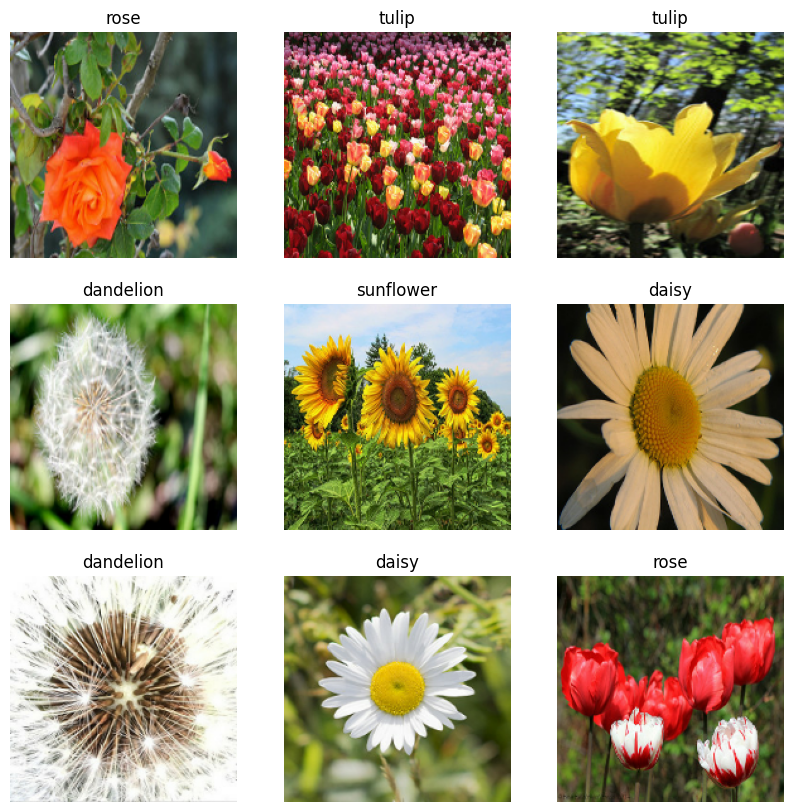

In [29]:
import matplotlib.pyplot as plt
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off') 

In [30]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)


In [ ]:
#Data Augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])


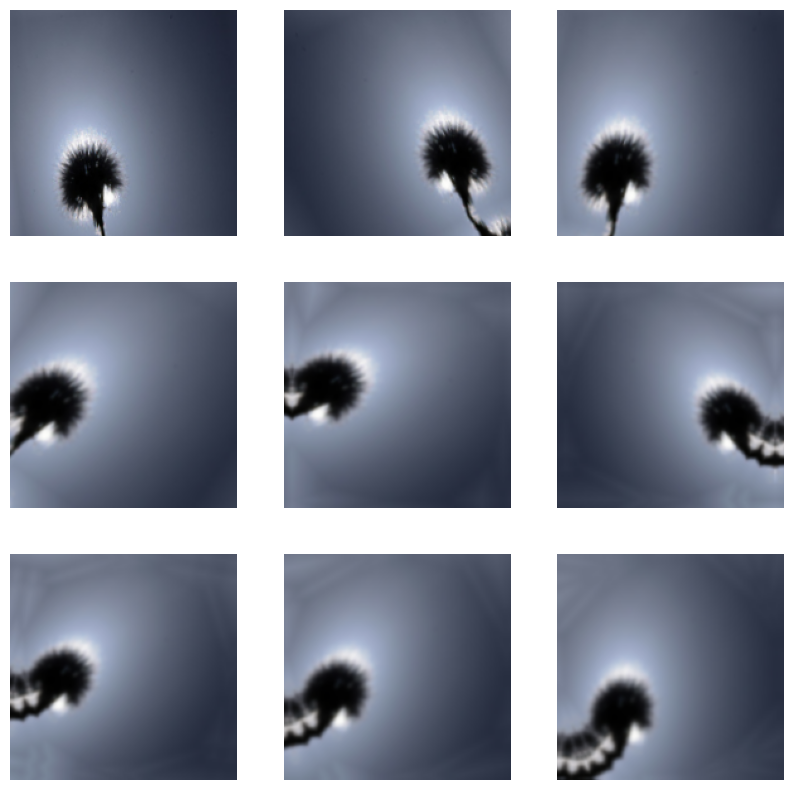

In [35]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3, 3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        # plt.title(flower_names[labels[i]])
        plt.axis('off') 